# Notes from career track 'Data Scientist with Python'

In [32]:
# all imports
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## Basic stuff

use `str` to convert numerical variables (int/float) into a string.

In [1]:
savings = 100
result = 100 * 1.10 ** 7
print("I started with $" + str(savings) + " and now have $" + str(result) + ". Awesome!")

I started with $100 and now have $194.87171000000012. Awesome!


Careful when copying lists: Python copies the __reference__ to the elements of the list:

In [2]:
x = [1, 2, 3]
y = x
y[1] = "changed"
print(x)

[1, 'changed', 3]


Instead, use `copy`:

In [3]:
x = [1, 2, 3]
y = x.copy() #for simple lists, y=list(x) or y=x[:] also works
y[1] = "changed"
print(x)

[1, 2, 3]


Remove elements with `del()`

In [8]:
x = [1, 2, 3]
x = x*2
print(x)
del(x[-3:-1]) #removes only element -3 and -2!
print(x)

[1, 2, 3, 1, 2, 3]
[1, 2, 3, 3]


A method is: a function that can be applied to an object type, e.g. `str-object.method`.
Use `help(function)` to see the methods that can be used for an object, e.g. for strings:

In [1]:
#help(str)

## Boolean operators

In [ ]:
not(not(x < 3) and not(y > 14 or y > 10))  #Notice that not has a higher priority than and and or, it is executed first.

## Visualization

### Line and scatter plot

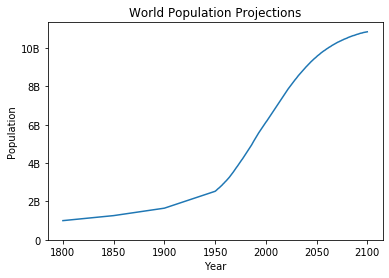

In [2]:
year = range(1950, 2101)
pop = [2.53, 2.57, 2.62, 2.67, 2.71, 2.76, 2.81, 2.86, 2.92, 2.97, 3.03, 3.08, 3.14, 3.2, 3.26, 3.33, 3.4, 3.47, 3.54,
      3.62, 3.69, 3.77, 3.84, 3.92, 4.0, 4.07, 4.15, 4.22, 4.3, 4.37, 4.45, 4.53, 4.61, 4.69, 4.78, 4.86, 4.95,
      5.05, 5.14, 5.23, 5.32, 5.41, 5.49, 5.58, 5.66, 5.74, 5.82, 5.9, 5.98, 6.05, 6.13, 6.2, 6.28, 6.36, 6.44,
      6.51, 6.59, 6.67, 6.75, 6.83, 6.92, 7.0, 7.08, 7.16, 7.24, 7.32, 7.4, 7.48, 7.56, 7.64, 7.72, 7.79, 7.87, 
      7.94, 8.01, 8.08, 8.15, 8.22, 8.29, 8.36, 8.42, 8.49, 8.56, 8.62, 8.68, 8.74, 8.8, 8.86, 8.92, 8.98, 9.04, 
      9.09, 9.15, 9.2, 9.26, 9.31, 9.36, 9.41, 9.46, 9.5, 9.55, 9.6, 9.64, 9.68, 9.73, 9.77, 9.81, 9.85, 9.88, 
      9.92, 9.96, 9.99, 10.03, 10.06, 10.09, 10.13, 10.16, 10.19, 10.22, 10.25, 10.28, 10.31, 10.33, 10.36, 
       10.38, 10.41, 10.43, 10.46, 10.48, 10.5, 10.52, 10.55, 10.57, 10.59, 10.61, 10.63, 10.65, 10.66, 10.68, 
      10.7, 10.72, 10.73, 10.75, 10.77, 10.78, 10.79, 10.81, 10.82, 10.83, 10.84, 10.85]

year = [1800, 1850, 1900] + list(year) #force to list, since year was 'range'
pop = [1.0, 1.262, 1.650] + pop

plt.plot(year, pop)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population Projections')
plt.yticks([0, 2, 4, 6, 8, 10],
          ['0','2B', '4B','6B','8B','10B'])

plt.show()

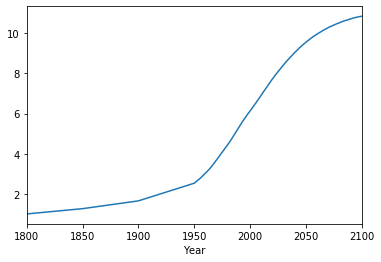

In [16]:
#or: directly using Pandas
#worldpop = {'height': heights, 'sex': 'M'}
worldpop_df = pd.DataFrame({'Year': year,'Population': pop})
worldpop_df.index = worldpop_df['Year']
worldpop_df['Population'].plot()
plt.show()

In [33]:
# data for Hans Rosling bubble chart 'gapminder'
gapminder = pd.read_csv("data/gapminder.csv", index_col = 0, sep = ',')

#print(gapminder.head())

#make a list from a pandas Series
#gdp_cap = list(gapminder.gdp_cap)

#define size of points for each country
pop_size = np.array(gapminder.population) / 1000000 * 2
#map colors to continent of country
col_dict = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'Americas':'yellow',
    'Oceania':'black'
    }
gapminder['cont_col'] = gapminder.cont.map(col_dict)

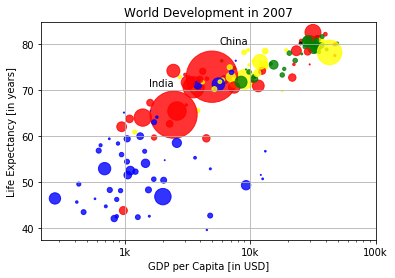

In [34]:
#pip3 install plotly_express
#import plotly_express as px

#px.scatter(px.data.gapminder(), x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
#           size="pop", color="country", hover_name="country", 
#           log_x = True, 
#           size_max=45, range_x=[100,100000], range_y=[25,90])
#gdp_cap = px.data.gapminderp["gdpPercap"]

# Scatter plot with dynamic size and color
plt.scatter(x = gapminder.gdp_cap, y = gapminder.life_exp, s = pop_size, c = gapminder.cont_col, alpha = 0.8)

# Put the x-axis on a logarithmic scale and other customizations
plt.xscale('log')
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

# Add grid() call
plt.grid(True)

# Show plot
plt.show()

### Histogram

In [ ]:
plt.hist(life_exp, bins=5)
plt.show()
plt.clf()

plt.hist(life_exp, bins=20)
plt.show()

### Ideas
https://towardsdatascience.com/pythons-one-liner-graph-creation-library-with-animations-hans-rosling-style-f2cb50490396

## Dictionaries

In [6]:
pop = [30.55, 2.77, 39.21]
countries = ["afghanistan","albania","algeria"]
#instead of:
print("Lookup using two lists: ",pop[countries.index("albania")])
#use a dictionary, with key-value pairs
world = {"afghanistan":30.55,
        "albania":2.77,
        "algeria":39.21}
#keys have to be unique and immutable objects (cannot be changed after creation, i.e. no lists in a dictionary)

print("Lookup using a dictionary: ",world["albania"])
print(world.keys())

Lookup using two lists:  2.77
Lookup using a dictionary:  2.77
dict_keys(['afghanistan', 'albania', 'algeria'])


In [7]:
#append dict:
world['sealand'] = 0.000027
'sealand' in world

True

In [8]:
#delete key-value
del(world['sealand'])
'sealand' in world

False

In [9]:
data = {'capital':'rome', 'population':59.83}
world['italy'] = data
world

{'afghanistan': 30.55,
 'albania': 2.77,
 'algeria': 39.21,
 'italy': {'capital': 'rome', 'population': 59.83}}

## Numpy

In [16]:
#logical operations on numpy arrays:
bmi = np.array([21.8, 20.9, 21.7, 24.7, 21.4])

print(bmi < 21) #single comparison operator works with np.arrays

np.logical_and(bmi > 21, bmi < 22) #for element wise boolean operators, use logical_and / _or / _not

print(bmi[np.logical_and(bmi > 21, bmi < 22)])

[False  True False False False]
[21.8 21.7 21.4]


## Pandas dataframes

Difference with 2D Numpy arrays: can hold different data types. Have unique row labels and column labels.
Built on top of Numpy, and is defined similar to a dictionary: keys (columns labels) and values (data, column, by column).

In [3]:
#example import from csv:
brics = pd.read_csv("data/brics.csv", index_col = 0, sep = ';', decimal = b',')
print(brics)

#access columns with double brackets
brics[['country', 'capital']]
#rows:
brics[1:4] #also 0-indexing and excluding [stop]!

#loc (label-based), iloc (position-based)
brics.loc[["RU", "IN", "CH"],["country", "capital"]] #and ':' for all rows/columns
brics.iloc[[1,2,3],[0,1]]

# Print out drives_right column as Series
#print(cars.loc[:, 'drives_right'])
# Print out drives_right column as DataFrame
#print(cars.loc[:, ['drives_right']])

#mix loc and iloc with ix

         country    capital    area  population
BR        Brazil   Brasilia   8.516      200.40
RU        Russia     Moscow  17.100      143.50
IN         India  New Delhi   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98


,country,capital
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing


### more on Pandas DataFrames

In [3]:
print("Column names of brics: ", str(brics.columns))
print()

#AAPL.index
#type(AAPL.index) #in this case a special Datetimeindex

brics.head(2) #similar as brics.iloc[:2,:]
#.tail()

print("Some info on brics DataFrame:")
print(brics.info())

Column names of brics:  Index(['country', 'capital', 'area', 'population'], dtype='object')

Some info on brics DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, BR to SA
Data columns (total 4 columns):
country       5 non-null object
capital       5 non-null object
area          5 non-null float64
population    5 non-null float64
dtypes: float64(2), object(2)
memory usage: 360.0+ bytes
None


In [5]:
#broadcasting
brics.iloc[::5, -1] = np.nan  #assign each 5th row a NaN value
print(brics.head())
print()

#Series
pop = brics['population']  #gives a Pandas Series, retaining indexes
print(pop.head())  #or .tail()
print()

pops = pop.values
print(type(pops)) #gives a Numpy array

         country    capital    area  population
BR        Brazil   Brasilia   8.516         NaN
RU        Russia     Moscow  17.100      143.50
IN         India  New Delhi   3.286     1252.00
CH         China    Beijing   9.597     1357.00
SA  South Africa   Pretoria   1.221       52.98

BR        NaN
RU     143.50
IN    1252.00
CH    1357.00
SA      52.98
Name: population, dtype: float64

<class 'numpy.ndarray'>


#### Pandas DF from a dict

In [8]:
# create a DF from dict (list of lists): e.g. users = pd.DataFrame(data)
# or, using zip()
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
signups = [7, 12, 3, 5]
visitors = [139, 237, 326, 456]
weekdays = ['Sun', 'Sun','Mon','Mon']
list_labels = ['city','signups','visitors','weekday'] #column labels
list_cols = [cities, signups, visitors, weekdays] #column entries, list of lists
zipped = list(zip(list_labels, list_cols))  #zip 2 lists together into one list of (key,value) tuples
print(zipped)
print()
data = dict(zipped) 
users = pd.DataFrame(data)
print(users)

print()
#broadcast:
users['fees'] = 0 #broadcast scalar value 0 to entire (new) column
print(users)

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']), ('signups', [7, 12, 3, 5]), ('visitors', [139, 237, 326, 456]), ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]

     city  signups  visitors weekday
0  Austin        7       139     Sun
1  Dallas       12       237     Sun
2  Austin        3       326     Mon
3  Dallas        5       456     Mon

     city  signups  visitors weekday  fees
0  Austin        7       139     Sun     0
1  Dallas       12       237     Sun     0
2  Austin        3       326     Mon     0
3  Dallas        5       456     Mon     0


In [12]:
heights = [59, 65, 63, 65, 64, 66, 64]
data = {'height': heights, 'sex': 'M'}  #broadcast upon creation of dict
results = pd.DataFrame(data)
results.columns = ['height (in)', 'Sex']
results.index = ['A', 'B','C','D','E','F','G']
print(results)

   height (in) Sex
A           59   M
B           65   M
C           63   M
D           65   M
E           64   M
F           66   M
G           64   M


### More on importing data

### using booleans in Pandas dataframes

In [4]:
#need Pandas Series for comparison! Single []
print(brics["area"] > 8) #or: brics.loc[:, "area"] or brics.iloc[:,2]

print(brics[brics["area"] > 8])
#for column with boolean values, simply use e.g. brics[brics['drives_right']]

area = brics["area"]
brics[np.logical_and(area > 8, area < 10)]

BR     True
RU     True
IN    False
CH     True
SA    False
Name: area, dtype: bool
   country   capital    area  population
BR  Brazil  Brasilia   8.516       200.4
RU  Russia    Moscow  17.100       143.5
CH   China   Beijing   9.597      1357.0


,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
CH,China,Beijing,9.597,1357.0


## Loops

In [17]:
#loop over a list
for index, capital in enumerate(brics["capital"]) :
    print("country " + str(index+1) + ": " + capital)

print()

#example for list of lists
house = [["hallway", 11.25], 
         ["kitchen", 18.0], 
         ["living room", 20.0], 
         ["bedroom", 10.75], 
         ["bathroom", 9.50]]
         
for room, area in house :
    print("the " + room + " is " + str(area) + " sqm")

country 1: Brasilia
country 2: Moscow
country 3: New Delhi
country 4: Beijing
country 5: Pretoria

the hallway is 11.25 sqm
the kitchen is 18.0 sqm
the living room is 20.0 sqm
the bedroom is 10.75 sqm
the bathroom is 9.5 sqm


### loops for dictionaries

In [18]:
world = {"afghanistan":30.55,
        "albania":2.77,
        "algeria":39.21}

#for dictionaries you need .items() method, result doesn't have to correspond with defined order,
#because dictonaries are inherently unordered!
#order of variables must be in key-value order!
for cntry, pop in world.items() :
    print(cntry + " -- " + str(pop))

afghanistan -- 30.55
albania -- 2.77
algeria -- 39.21


### loops for Numpy arrays

In [24]:
np_height = np.array([74, 74, 72, 75, 75, 73])
np_weight = np.array([180, 215, 210, 205, 190, 195])

for h in np_height :
    print(h)

print()
meas = np.array([np_height, np_weight])  #a 2D Numpy array, use nditer function!

for val in np.nditer(meas) :
    print(val, end=",")

74
74
72
75
75
73

74,74,72,75,75,73,180,215,210,205,190,195,

### loops for Pandas df

In [37]:
#regular for loop gives only column labels
for colname in brics :
    print(colname)
    
print()

#explicitly state to iterate over rows:
for lab, row in brics.iterrows() :  #lab gives index label, row is a Pandas Series
    print(lab + ": " + row["capital"])
    
for lab, row in brics.iterrows() :
    brics.loc[lab, "name_length"] = len(row["country"])  #however: creates a Series every iteration
print(brics)

#more efficient way with apply, first reset brics
brics = brics.iloc[:,0:4]
brics["name_length"] = brics["country"].apply(len)  #for functions
brics["COUNTRY"] = brics["country"].apply(str.upper) #for methods
print(brics)

country
capital
area
population
name_length

BR: Brasilia
RU: Moscow
IN: New Delhi
CH: Beijing
SA: Pretoria
         country    capital    area  population  name_length
BR        Brazil   Brasilia   8.516      200.40            6
RU        Russia     Moscow  17.100      143.50            6
IN         India  New Delhi   3.286     1252.00            5
CH         China    Beijing   9.597     1357.00            5
SA  South Africa   Pretoria   1.221       52.98           12
         country    capital    area  population  name_length       COUNTRY
BR        Brazil   Brasilia   8.516      200.40            6        BRAZIL
RU        Russia     Moscow  17.100      143.50            6        RUSSIA
IN         India  New Delhi   3.286     1252.00            5         INDIA
CH         China    Beijing   9.597     1357.00            5         CHINA
SA  South Africa   Pretoria   1.221       52.98           12  SOUTH AFRICA


## Hacker statistics: simulate random process

### Random generators

In [10]:
np.random.seed(123)
print("Random number: " + str(np.random.rand())) #pseudo-random numbers, for reproducibility
coin = np.random.randint(0,2) #ranomly generate 0 or 1
print(coin)
if coin == 0 :
    print("heads")
else :
    print("tails")
    
dice = np.random.randint(1, 7)

Random number: 0.6964691855978616
0
heads


### Random walk

In [6]:
# Initialize all_walks (don't change this line)
all_walks = []

# Simulate random walk 500 times
for i in range(500) :
    
    # Initialize random_walk
    random_walk = [0] # list with first entry 0

    # Complete the ___
    for x in range(100) :
        # Set step: last element in random_walk
        step = random_walk[-1]

        # Roll the dice
        dice = np.random.randint(1,7)

        # Determine next step
        if dice <= 2:
            step = max(0, step - 1)  #step can't go below 0
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        
        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        # append next_step to random_walk
        random_walk.append(step)
    # Plot one random_walk
    #plt.plot(random_walk)
    # Show the plot
    #plt.show()

    # Append random_walk to all_walks: list of lists
    all_walks.append(random_walk)
        
# Transform into Numpy array and transpose all_walks: 
# in np_aw_t every row represents position after 1 throw for the i random walks
# without transposing Python doesn't interpret the Numpy array correctly
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

### Distribution of random walks

In [ ]:
# Plot np_aw_t and show all random walks
plt.plot(np_aw_t)
plt.show()

plt.clf() #clear figure

# Plot a histogram, showing the distribution of the end points of all random walks
plt.hist(ends)
plt.show()

In [14]:
# calculate chance that you'll reach 60 steps high
chance = np.count_nonzero(ends >= 60) / 500  #or in this case, use np.sum(end >= 60)
print(chance)

#alternative
print(np.mean(ends >= 60))

0.784
0.784


## EDA - (visual) exploratory data analysis

For Pandas, use `.plot()` method with `subplots=True` to create subplots that are scaled independently.

In [1]:
stocks = pd.read_csv("data/stocks.csv", sep = ';', decimal = b',', header = 0)

### Line plot

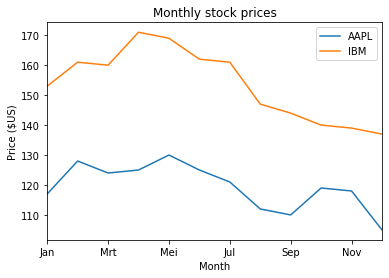

In [46]:
y_columns = ['AAPL', 'IBM']
stocks.plot(x='Month', y=y_columns)
plt.title('Monthly stock prices')
plt.ylabel('Price ($US)')
plt.show()

### Scatter plot

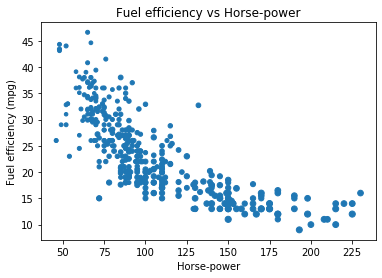

In [7]:
col_names_cars = ['mpg', 'cylinders', 'displacement', 'bhp', 'weight', 'acceleration', 'model_year', 'origin', 'car name' ]
cars = pd.read_csv("data/auto-mpg.data", sep = '\s+', 
                   header = None, names = col_names_cars,
                   na_values='?')
#print(cars.head(), '\n')
#print(cars.describe())

v = cars['weight'].values
#weight_norm = v / np.sqrt(np.sum(v**2)) 
weight_norm = v / np.linalg.norm(v, ord=-2)
#print(weight_norm)

cars.plot(kind='scatter', x='bhp', y='mpg', s=weight_norm)
plt.title('Fuel efficiency vs Horse-power')
plt.xlabel('Horse-power')
plt.ylabel('Fuel efficiency (mpg)')
plt.show()

### Box plot as subplots with different scale

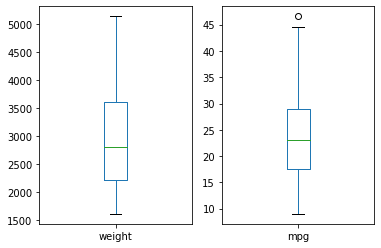

In [48]:
cols = ['weight', 'mpg']
cars[cols].plot(kind='box',subplots=True)
plt.show()

### pandas hist, pdf and cdf

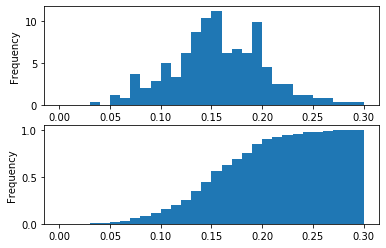

In [65]:
tips = pd.read_csv("data/tips.csv", header = 0)

tips['fraction'] = tips.tip / tips.total_bill

tips.describe()

# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
tips.fraction.plot(ax=axes[0], 
    kind='hist', density=True, bins=30, range=(0,.3))

# Plot the CDF
tips.fraction.plot(ax=axes[1], 
    kind='hist', density=True, cumulative=True, bins=30, range=(0,.3))

plt.show()

## Statistical EDA

In [10]:
print(stocks.describe(), "\n")
print(stocks.mean(), "\n")
q = [0.05, 0.95]
print(stocks.quantile(q))


             AAPL        GOOG         IBM
count   12.000000   12.000000   12.000000
mean   119.500000  607.500000  153.666667
std      7.573879   86.014269   11.949388
min    105.000000  520.000000  137.000000
25%    115.750000  536.250000  143.000000
50%    120.000000  583.000000  156.500000
75%    125.000000  646.250000  161.250000
max    130.000000  758.000000  171.000000 

AAPL    119.500000
GOOG    607.500000
IBM     153.666667
dtype: float64 

        AAPL   GOOG    IBM
0.05  107.75  526.6  138.1
0.95  128.90  749.2  169.9


In [9]:
cars.mpg.median()

23.0

In [20]:
col_names_iris = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv("data/iris.data", 
                   header = None, 
                   names = col_names_iris,
                   index_col=False)
print(iris.describe())
print(iris.species.unique())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


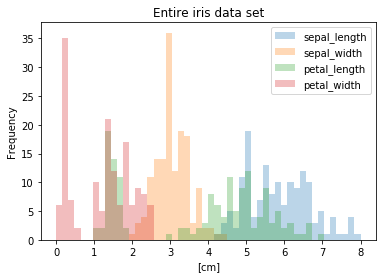

In [21]:
iris.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Entire iris data set')
plt.xlabel('[cm]')
plt.show()
#bit messy, lot of overlap

In [24]:
#filter by species:
setosa = iris.loc[iris['species'] == 'Iris-setosa', :]
versicolor = iris.loc[iris['species'] == 'Iris-versicolor', :]
virginica = iris.loc[iris['species'] == 'Iris-virginica', :]
del setosa['species'], versicolor['species'], virginica['species']

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


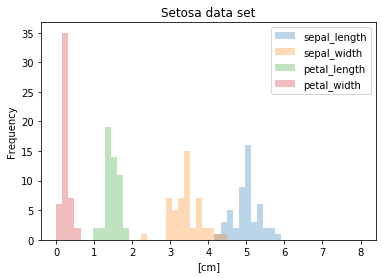

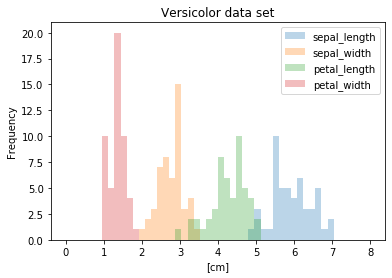

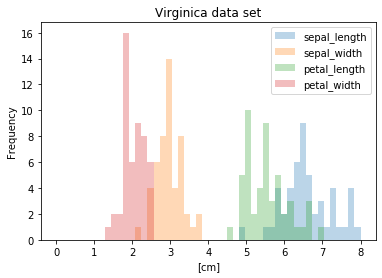

In [25]:
setosa.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Setosa data set')
plt.xlabel('[cm]')
versicolor.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Versicolor data set')
plt.xlabel('[cm]')
virginica.plot(kind='hist', bins=50, range=(0,8), alpha=0.3)
plt.title('Virginica data set')
plt.xlabel('[cm]')

plt.show()

In [27]:
describe_all = iris.describe()
describe_setosa = setosa.describe()
describe_versicolor = versicolor.describe()
describe_virginica = virginica.describe()

# compute percentage error
error_setosa = (100 * np.abs(describe_setosa - describe_all)) / describe_setosa
error_versicolor = (100 * np.abs(describe_versicolor - describe_all)) / describe_versicolor
error_virginica = (100 * np.abs(describe_virginica - describe_all)) / describe_virginica

print(error_setosa)
#especially for petal length and width great difference between overall mean and species specific mean

       sepal_length  sepal_width  petal_length  petal_width
count    200.000000   200.000000    200.000000   200.000000
mean      16.726595    10.649503    156.739526   391.256831
std      134.919250    13.796994    916.891608   611.840574
min        0.000000    13.043478      0.000000     0.000000
25%        6.250000    10.400000     14.285714    50.000000
50%       16.000000    11.764706    190.000000   550.000000
75%       23.076923    10.204082    223.809524   500.000000
max       36.206897     0.000000    263.157895   316.666667


## Time series in pandas

In [20]:
weather = pd.read_csv('data/weather_data_austin_2010.csv',
                      parse_dates = True, #parse_dates=['Date'] would only convert to full datetime, but doesnt use it as index
                      index_col = 'Date')
print(weather.describe(), "\n")
print(weather.info())

       Temperature     DewPoint  Pressure
count  8759.000000  8759.000000    8759.0
mean     68.077258    55.939057       1.0
std      13.773378    11.757706       0.0
min      41.800000    35.300000       1.0
25%      57.100000    44.400000       1.0
50%      68.700000    57.300000       1.0
75%      78.550000    67.800000       1.0
max      95.300000    72.900000       1.0 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB
None


In [16]:
##Partial datetime string selection, gives all data for this date
#sales.loc['2015-2-5'] 
#sales.loc['February 5, 2015']
#sales.loc['2015-Feb-5']
#sales.loc['2015-2']
#sales.loc['2015']
#sales.loc['2015-2-5':'2015-2-9']

august = weather.Temperature['August, 2010'] #or: ['2010-8-1':'2010-8-31']

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

### Resampling

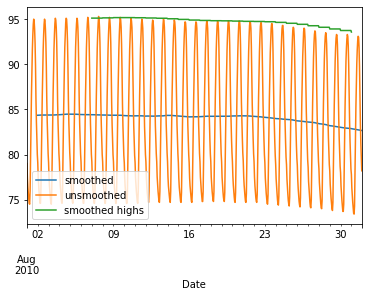

In [19]:
# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = august.rolling(window=24).mean()
daily_highs_smoothed = august.resample('D').max().rolling(window=7).mean().resample('H').ffill()

# Create a new DataFrame with columns smoothed and unsmoothed: august_weather
august_weather = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':august, 'smoothed highs':daily_highs_smoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august_weather.plot()
plt.show()

## Case Study: weather vs climate

In [80]:
NOAA_2011 = pd.read_csv('data/NOAA_QCLCD_2011_hourly_13904.txt', 
                        header=None)

column_labels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

#apply column labels
NOAA_2011.columns = list(column_labels.split(','))
#drop unneccessary columns in original dataframe, no need to assign
NOAA_2011.drop(list_to_drop, axis='columns', inplace=True)
# Convert the date column to string: df_dropped['date']
NOAA_2011['date'] = NOAA_2011['date'].astype(str)
# Pad leading zeros to the Time column: df_dropped['Time']
NOAA_2011['Time'] = NOAA_2011['Time'].apply(lambda x:'{:0>4}'.format(x))
# Concatenate the new date and Time columns: date_string
date_string = NOAA_2011.date + NOAA_2011.Time
# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')
NOAA_2011.set_index(date_times, inplace=True)

#Clean numeric columns
#Missing values are labeled as 'M'
print(NOAA_2011.loc['June 20, 2011, 08:00 AM':'June 20, 2011, 09:00 AM', 'dry_bulb_faren'])
NOAA_2011['dry_bulb_faren'] = pd.to_numeric(NOAA_2011['dry_bulb_faren'], errors='coerce')
NOAA_2011['wind_speed'] = pd.to_numeric(NOAA_2011['wind_speed'], errors='coerce')
NOAA_2011['dew_point_faren'] = pd.to_numeric(NOAA_2011['dew_point_faren'], errors='coerce')
NOAA_2011['visibility'] = pd.to_numeric(NOAA_2011['visibility'], errors='coerce')

#print(NOAA_2011.head(), "\n")
print(NOAA_2011.describe())

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object
          Wban  StationType    visibility  dry_bulb_faren  dew_point_faren  \
count  10337.0      10337.0  10324.000000     10326.00000     10323.000000   
mean   13904.0         12.0      9.172677        69.16841        54.757144   
std        0.0          0.0      2.107100        17.85284        15.812253   
min    13904.0         12.0      0.000000        18.00000         6.000000   
25%    13904.0         12.0     10.000000        57.00000        43.000000   
50%    13904.0         12.0     10.000000        72.00000        60.000000   
75%    13904.0         12.0     10.000000        81.00000        68.000000   
max    13904.0         12.0     10.000000       110.00000        76.000000   

 

### Statistical EDA

In [46]:
# Print the median of the dry_bulb_faren column
print('Median temperature:', NOAA_2011['dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print('Median temperature Apr-Jun 2011:', NOAA_2011.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())

# Print the median of the dry_bulb_faren column for the month of January
print('Median temperature Jan 2011:', NOAA_2011.loc['2011-Jan', 'dry_bulb_faren'].median())

Median temperature:  72.0
Median temperature Apr-Jun 2011:  78.0
Median temperature Jan 2011:  48.0


In [48]:
print('on average, how much hotter was every day in 2011 than expected from the 30-year average?')
#30-year normals reported in 2010
df_climate = pd.read_csv('data/weather_data_austin_2010.csv',
                      parse_dates = True, #parse_dates=['Date'] would only convert to full datetime, but doesnt use it as index
                      index_col = 'Date')

# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = NOAA_2011.resample('D').mean()
# Extract the dry_bulb_faren column from daily_mean_2011 as a NumPy array using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample('D').mean()
# Extract the Temperature column from daily_climate using alternative approach to align both Series properly
# use .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print('Average temp (F) difference in 2011 compared to 30-year normals:', difference.mean())

Average temp (F) difference in 2011 compared to 30-year normals: 1.3301831870056482


In [56]:
print('On average, how much hotter is it when the sun is shining?')

# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = NOAA_2011['sky_condition']=='CLR'
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = NOAA_2011['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_clear
sunny = NOAA_2011.loc[is_sky_clear]
#or: sunny = df_clean[is_sky_clear]  #using is_sky_clear as mask
overcast = NOAA_2011.loc[is_sky_overcast]

# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()
overcast_daily_max = overcast.resample('D').max()

# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()
# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean - overcast_daily_max_mean)

On average, how much hotter is it when the sun is shining?
Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


### Visual EDA

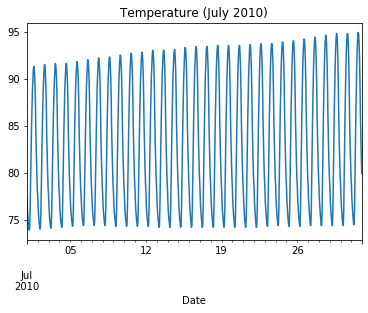

In [57]:
df_climate.Temperature['2010-07'].plot()
plt.title('Temperature (July 2010)')
plt.show()

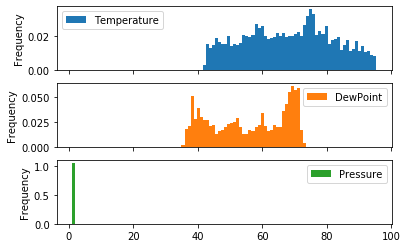

In [63]:
df_climate.plot(kind='hist', density=True, bins=100, subplots=True)
#plt.title('Dew Point distribution (2010)')
plt.show()

Is there a correlation between temperature and visibility? Let's find out.
                visibility  dry_bulb_faren
visibility        1.000000        0.490328
dry_bulb_faren    0.490328        1.000000 



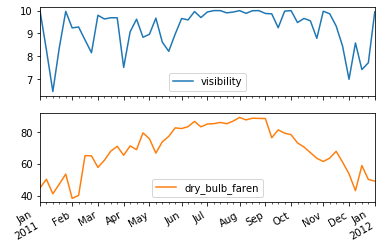

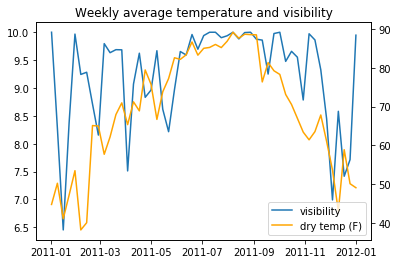

In [99]:
print('Is there a correlation between temperature and visibility? Let\'s find out.')

# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = NOAA_2011[['visibility', 'dry_bulb_faren']].resample('W').mean()

# Print the output of weekly_mean.corr()
print(weekly_mean.corr(),'\n')

# Plot weekly_mean with subplots=True - two separate plots, with automated markup
weekly_mean.plot(subplots=True)
plt.show()

fig, ax1 = plt.subplots()

#color = 'tab:red'
#ax1.set_xlabel('time (s)')
#ax1.set_ylabel('exp', color=color)
ax1.plot(weekly_mean['visibility'], label='visibility')#, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(weekly_mean['dry_bulb_faren'], label='dry temp (F)', color='orange')
#ax2.tick_params(axis='y', labelcolor=color)

#add legend, not shown by default
#method 1
# add figure legend, outside plot
#fig.legend(loc=0)
#method 2
# ask matplotlib for the plotted objects and their labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Weekly average temperature and visibility')
plt.show()


Daily hours of clear sky


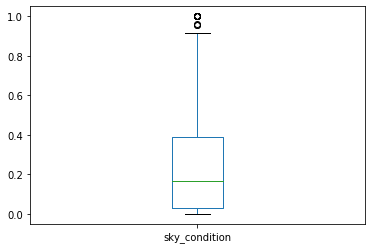

Typically, the weather is sunny less than 40% of the time


In [98]:
print('Daily hours of clear sky')

#number of sunny hours in a day divided by the number of total hours recorded per day
sunny_fraction = is_sky_clear.resample('D').sum() / is_sky_clear.resample('D').count()
# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

print('Typically, the weather is sunny less than 40% of the time')

Heat or humidity?


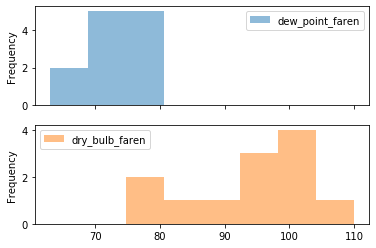

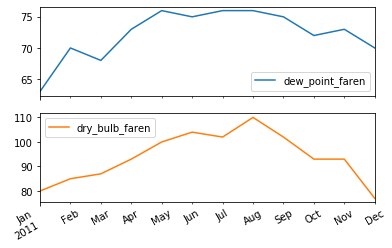

Most months humidity is uncomfortable (>65) and temp as well (>90)


In [103]:
print('Heat or humidity?',)
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = NOAA_2011[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot(kind='hist', bins=8, alpha=0.5, subplots=True)
monthly_max.plot(subplots=True)

# Show the plot
plt.show()

print('Most months humidity is uncomfortable (>65) and temp as well (>90)')

Probability of high temperatures
Max temp in Aug normally: 95.3


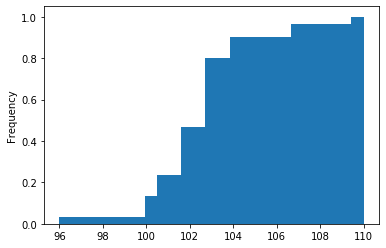

there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!


In [106]:
print('Probability of high temperatures')

# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = df_climate.Temperature['August, 2010'].max()
print('Max temp in Aug normally:', august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = NOAA_2011.loc['2011-Aug','dry_bulb_faren'].resample('D').max()

# Filter for days in august_2011 where the value exceeds august_max: august_2011_high
august_2011_high = august_2011[august_2011 > august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot(kind='hist',density=True,cumulative=True,bins=25)

# Display the plot
plt.show()
print('there was a 50% probability of the 2011 daily maximum temperature in August being 5 degrees above the 2010 climate normal value!')